In [1]:
import csv
import pandas as pd
import numpy as np 
import os
import nltk
import re
from nltk import word_tokenize


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [3]:
df0 = pd.read_csv("/Users/yaminirege/Desktop/E2014.csv")
df1 = pd.read_csv("/Users/yaminirege/Desktop/2.2015.csv")
df2 = pd.read_csv("/Users/yaminirege/Desktop/3.2016.csv")
df3 = pd.read_csv("/Users/yaminirege/Desktop/4.2017.csv")
df4 = pd.read_csv("/Users/yaminirege/Desktop/5.2018.csv")
df5 = pd.read_csv("/Users/yaminirege/Desktop/6.2019.csv")
df6 = pd.read_csv("/Users/yaminirege/Desktop/7.2020.csv")


In [4]:
df0.head()

,ID,Terms,Class (BOT),Major,Conc,Coop,Citizenship,Strengths,Weakness,Acad,Merged1
0,6,201435-201445,SR,ACCT,4COP,0,US Citizen,[Student's] strengths include the ability to m...,In the time that I worked with [Student] - the...,None,[Student's] strengths include the ability to m...
1,11,201415-201425,JR,FIN,4COP,0,US Citizen,Demonstrates knowledge in compiling and analyz...,Improvement needed in areas of following proto...,Student needs a strong role model to help him ...,Demonstrates knowledge in compiling and analyz...
2,25,201435-201445,JR,GBUS,4COP,0,US Citizen,"[Student] is detail-oriented, customer-focused...",Opportunity exists for [Student] to know his a...,Training or a course on Corporate Communicatio...,"[Student] is detail-oriented, customer-focused..."
3,37,201435-201445,SR,LGST,5COP,2,US Citizen,Excellent attention to detail and work ethic. ...,Communicating issues in a simple concise manne...,None,Excellent attention to detail and work ethic. ...
4,44,201435-201445,SO,BAE,5COP,1,US Citizen,"Communication skills, leadership, lead by example",late on occasion,None,"Communication skills, leadership, lead by exam..."


In [5]:
print(df0.shape)
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)
print(df6.shape)


(767, 11)
(622, 11)
(616, 11)
(657, 11)
(326, 11)
(574, 11)
(705, 11)


In [6]:
#VADER Sentiment Scoring

from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [7]:
# Run the polarity score on the entire dataset 2014
res0 = {}
for i, row in tqdm(df0.iterrows(), total=len(df0)):
    text0 = row['Merged1']
    myid0 = row['ID']
    res0[myid0] = sia.polarity_scores(text0)

  0%|          | 0/767 [00:00<?, ?it/s]

In [8]:
# Run the polarity score on the entire dataset 2015
res1 = {}
for i, row in tqdm(df1.iterrows(), total=len(df1)):
    text1 = row['Merged']
    myid1 = row['Responder ID']
    res1[myid1] = sia.polarity_scores(text1)

  0%|          | 0/622 [00:00<?, ?it/s]

In [9]:
# Run the polarity score on the entire dataset 2016
res2 = {}
for i, row in tqdm(df2.iterrows(), total=len(df2)):
    text2 = row['Merged']
    myid2 = row['Responder ID']
    res2[myid2] = sia.polarity_scores(text2)

  0%|          | 0/616 [00:00<?, ?it/s]

In [10]:
# Run the polarity score on the entire dataset 2017
res3 = {}
for i, row in tqdm(df3.iterrows(), total=len(df3)):
    text3 = row['Merged']
    myid3 = row['Responder ID']
    res3[myid3] = sia.polarity_scores(text3)

  0%|          | 0/657 [00:00<?, ?it/s]

In [11]:
# Run the polarity score on the entire dataset 2018
res4 = {}
for i, row in tqdm(df4.iterrows(), total=len(df4)):
    text4 = row['Merged']
    myid4 = row['Responder ID']
    res4[myid4] = sia.polarity_scores(text4)

  0%|          | 0/326 [00:00<?, ?it/s]

In [12]:
# Run the polarity score on the entire dataset 2019
res5 = {}
for i, row in tqdm(df5.iterrows(), total=len(df5)):
    text5 = row['Merged']
    myid5 = row['Responder ID']
    res5[myid5] = sia.polarity_scores(text5)

  0%|          | 0/574 [00:00<?, ?it/s]

In [13]:
# Run the polarity score on the entire dataset 2020
res6 = {}
for i, row in tqdm(df6.iterrows(), total=len(df6)):
    text6 = row['merged']
    myid6 = row['Responder ID']
    res6[myid6] = sia.polarity_scores(text6)

  0%|          | 0/705 [00:00<?, ?it/s]

In [14]:
vaders0 = pd.DataFrame(res0).T
vaders0 = vaders0.reset_index().rename(columns={'index': 'ID'})
vaders0 = vaders0.merge(df0, how='left')

In [15]:
#2014
vaders0.head()

,ID,neg,neu,pos,compound,Terms,Class (BOT),Major,Conc,Coop,Citizenship,Strengths,Weakness,Acad,Merged1
0,6,0.0,0.853,0.147,0.8934,201435-201445,SR,ACCT,4COP,0,US Citizen,[Student's] strengths include the ability to m...,In the time that I worked with [Student] - the...,None,[Student's] strengths include the ability to m...
1,11,0.0,0.773,0.227,0.8555,201415-201425,JR,FIN,4COP,0,US Citizen,Demonstrates knowledge in compiling and analyz...,Improvement needed in areas of following proto...,Student needs a strong role model to help him ...,Demonstrates knowledge in compiling and analyz...
2,25,0.0,0.852,0.148,0.5719,201435-201445,JR,GBUS,4COP,0,US Citizen,"[Student] is detail-oriented, customer-focused...",Opportunity exists for [Student] to know his a...,Training or a course on Corporate Communicatio...,"[Student] is detail-oriented, customer-focused..."
3,37,0.0,0.711,0.289,0.9538,201435-201445,SR,LGST,5COP,2,US Citizen,Excellent attention to detail and work ethic. ...,Communicating issues in a simple concise manne...,None,Excellent attention to detail and work ethic. ...
4,44,0.0,1.000,0.000,0.0000,201435-201445,SO,BAE,5COP,1,US Citizen,"Communication skills, leadership, lead by example",late on occasion,None,"Communication skills, leadership, lead by exam..."


In [16]:
#2015
vaders1 = pd.DataFrame(res1).T
vaders1 = vaders1.reset_index().rename(columns={'index': 'Responder ID'})
vaders1 = vaders1.merge(df1, how='left')

In [17]:
vaders1.head()

,Responder ID,neg,neu,pos,compound,Terms,Major,Conc,Class,Citizenship,Coop,Strengths,Weakness,Acad,Merged
0,2408,0.000,0.949,0.051,0.0772,201535-201545,FIN,5COP,SR,Non US Citizen,3,His dedication to understanding the material ...,He should be more communicative with managers ...,More accounting course work.,His dedication to understanding the material ...
1,63,0.023,0.943,0.034,0.2023,201515-201525,ACCT,4COP,SR,US Citizen,0,Rita was very professional in her involvement ...,Rita would sometimes overwhelm herself with ta...,None,Rita was very professional in her involvement ...
2,71,0.000,0.753,0.247,0.7096,201515-201525,MIS,4COP,JR,Resident Alien Non-Citizen,0,Provieding feedback and following up on tasks....,attendance needs improving. Verbal communicati...,None,Provieding feedback and following up on tasks....
3,2432,0.000,0.747,0.253,0.7783,201535-201545,BAE,5COP,PJ,US Citizen,2,1) Maturity\r\n2) Self starter and ability to ...,1) Interpersonal relationships and communicat...,None,1) Maturity\r\n2) Self starter and ability to ...
4,78,0.018,0.752,0.230,0.9662,201515-201525,ACCT,5COP,SR,US Citizen,3,Chris quickly grasped difficult concepts perta...,I would suggest that Chris be mindful to consi...,None,Chris quickly grasped difficult concepts perta...


In [18]:
#2016
vaders2 = pd.DataFrame(res2).T
vaders2 = vaders2.reset_index().rename(columns={'index': 'Responder ID'})
vaders2 = vaders2.merge(df2, how='left')

In [19]:
vaders2.head()

,Responder ID,neg,neu,pos,compound,Work Terms,Major,Conc,Class,Citizenship,Coop,Strengths,Weakness,Acad,Merged
0,98,0.063,0.852,0.085,0.1618,201615-201625,FIN,5COP,SR,US Citizen,3,Michael was enthusiastic in his responsibiliti...,He was honest in his assessment that this is n...,More math and accounting course work.,Michael was enthusiastic in his responsibiliti...
1,105,0.000,0.860,0.140,0.8889,201615-201625,ACCT,5COP,SR,US Citizen,3,Andrew added a lot of value to PCM during his ...,Andrew can continue to grow and improve his wr...,Andrew had a great foundation from his classwo...,Andrew added a lot of value to PCM during his ...
2,148,0.047,0.854,0.099,0.6597,201615-201625,GBUS,5COP,JR,US Citizen,3,Nick got along well with other co-ops and was ...,Nick showed little initiative to learn or grow...,I don't think any poor performance is due to l...,Nick got along well with other co-ops and was ...
3,159,0.051,0.866,0.083,0.8660,201615-201625,FIN,5COP,SR,US Citizen,3,"Dave is an incredibly hard worker, and stays m...",Sometimes the quality of Dave's products suffe...,None,"Dave is an incredibly hard worker, and stays m..."
4,181,0.000,0.869,0.131,0.8360,201615-201625,MKTG,5COP,JR,US Citizen,3,Lauren has a fantastic ability to take what sh...,An area of improvement for Lauren is to take t...,None,Lauren has a fantastic ability to take what sh...


In [20]:
#2017
vaders3 = pd.DataFrame(res3).T
vaders3 = vaders3.reset_index().rename(columns={'index': 'Responder ID'})
vaders3 = vaders3.merge(df3, how='left')

In [21]:
vaders3.head()

,Responder ID,neg,neu,pos,compound,Work Terms,Major,Concentration,Class,Citizenship,Coop,Strengths,Weakness,Acad,Merged
0,391,0.031,0.736,0.233,0.9678,201715-201725,FIN,5COP,SO,US Citizen,1,Over the course of Sachin's co-op he demonstra...,Sachin struggled with multi-tasking and time m...,His performance was relatively static--we did ...,Over the course of Sachin's co-op he demonstra...
1,1465,0.036,0.733,0.231,0.9118,201715-201725,FIN,5COP,JR,US Citizen,3,Steve is very dependable and was able to work ...,Steve is young but he should not be afraid of ...,None,Steve is very dependable and was able to work ...
2,1476,0.000,0.837,0.163,0.8266,201715-201725,OSCM,5COP,JR,US Citizen,3,Taniya has been a great asset to the team. She...,Taniya can look to perhaps be a little more as...,None,Taniya has been a great asset to the team. She...
3,393,0.000,0.485,0.515,0.8625,201715-201725,LGST,4COP,PJ,US Citizen,0,"mature, pleasant interaction with FAIMER staff...","problem solving, productivity",None,"mature, pleasant interaction with FAIMER staff..."
4,1484,0.000,0.640,0.360,0.7351,201715-201725,MKTG,5COP,SR,US Citizen,3,Great attitude and willingness to learn,Better development of Root Cause and suggestiv...,None,Great attitude and willingness to learnBetter ...


In [22]:
#2018
vaders4 = pd.DataFrame(res4).T
vaders4 = vaders4.reset_index().rename(columns={'index': 'Responder ID'})
vaders4 = vaders4.merge(df4, how='left')

In [23]:
vaders4.head()

,Responder ID,neg,neu,pos,compound,Work Terms,Major,Concentration,Class,Citizenship,Coop,Strengths,Weakness,Acad,Merged
0,427,0.00,0.686,0.314,0.9814,201815-201825,FIN,5COP,PJ,US Citizen,2,Sachin is dedicated to delivering high quality...,Sachin can improve upon his confidence with pu...,None,Sachin is dedicated to delivering high quality...
1,428,0.00,0.859,0.141,0.5574,201815-201825,FIN,5COP,JR,US Citizen,3,Positive outlook for work and interaction with...,Initiative and overall business / financial ac...,Strengthen his knowledge of matters of corpora...,Positive outlook for work and interaction with...
2,1648,0.00,0.872,0.128,0.9359,201815-201825,BAE,5COP,SR,US Citizen,3,- Very Bright; Absorbs & understands complicat...,"At Midpoint, Frankie was given feedback about ...",None,- Very Bright; Absorbs & understands complicat...
3,1651,0.00,0.897,0.103,0.3182,201815-201825,INT1,5COP,SR,US Citizen,3,"Dedication, teamwork, quality performance, abi...",Reinsurance industry technical knowledge throu...,Continue to take relevant classes and move to ...,"Dedication, teamwork, quality performance, abi..."
4,1652,0.03,0.885,0.085,0.8402,201815-201825,BAE,5COP,JR,US Citizen,3,Reliable and persistent. Han did not have the...,Communication - has a hard time framing a summ...,Better business communication in the workplace...,Reliable and persistent. Han did not have the...


In [24]:
#2019
vaders5 = pd.DataFrame(res5).T
vaders5 = vaders5.reset_index().rename(columns={'index': 'Responder ID'})
vaders5 = vaders5.merge(df5, how='left')

In [25]:
vaders5.head()

,Responder ID,neg,neu,pos,compound,Work Terms,Major,Concentration,Class,Citizenship,Coop,Strengths,Weakness,Acad,Merged
0,12,0.045,0.756,0.199,0.9169,201915-201925,FIN,5COP,JR,Domestic,3,Consistently willing to help out wherever nece...,Needs to pay more attention to detail and ensu...,Please note that this is not directly related ...,Consistently willing to help out wherever nece...
1,27,0.014,0.769,0.217,0.9954,201935-201945,BAE,5COP,SR,Domestic,3,1. Energy and thirst for learning new skills\r...,1. More Frequent Communication & Status Update...,N/A - Perfect fit,1. Energy and thirst for learning new skills\r...
2,58,0.000,0.803,0.197,0.9325,201935-201945,SPBS,5COP,SR,Domestic,3,Jalen connects well with his peers. He is a g...,Jalen can improve on being more aligned with t...,I would encourage Jalen to seek out courses in...,Jalen connects well with his peers. He is a g...
3,69,0.167,0.833,0.000,-0.1027,201925-201935,ACCT,5COP,SR,Domestic,0,hard worker and consistently showed up on time,na,na,hard worker and consistently showed up on timena
4,75,0.045,0.800,0.155,0.7096,201935-201945,MKTG,5COP,SR,Domestic,3,As you can see by all of the Top 10% selection...,His biggest weakness is the rate at which I'm ...,No changes.,As you can see by all of the Top 10% selection...


In [26]:
#2020
vaders6 = pd.DataFrame(res6).T
vaders6 = vaders6.reset_index().rename(columns={'index': 'Responder ID'})
vaders6 = vaders6.merge(df6, how='left')

In [27]:
vaders6.head()

,Responder ID,neg,neu,pos,compound,Work Terms,Major,Concentration,Class BOT,Citizenship,Coop,Strengths,Weakness,Acad,merged
0,2181,0.000,0.381,0.619,0.7579,Spring/Summer,ACCT,5COP,SR,Domestic,3,Asks good questions and positive attitude,na,na,Asks good questions and positive attitudena
1,74,0.131,0.656,0.213,0.3818,Fall/Winter,MIS,5COP,SR,Domestic,3,Numbers based analytics / advanced excel,Self motivation (I believe this was a tough ye...,NaN,Numbers based analytics / advanced excelSelf m...
2,5586,0.097,0.718,0.185,0.6447,Spring/Summer,FIN,5COP,SR,Domestic,2,Christina is organized and focused. She accept...,There were times that she failed to get inform...,Just continue on the path of learning and take...,Christina is organized and focused. She accept...
3,2366,0.042,0.777,0.182,0.7506,Spring/Summer,FIN,5COP,SR,Domestic,3,Justin was able to pick up processes quickly a...,Justin has opportunity to develop his skills a...,NaN,Justin was able to pick up processes quickly a...
4,2367,0.024,0.661,0.315,0.9836,Spring/Summer,MKTG,5COP,SR,Domestic,3,"Alessandra had a wonderful attitude, was highl...",Alessandra was wonderful and an asset to our t...,None,"Alessandra had a wonderful attitude, was highl..."


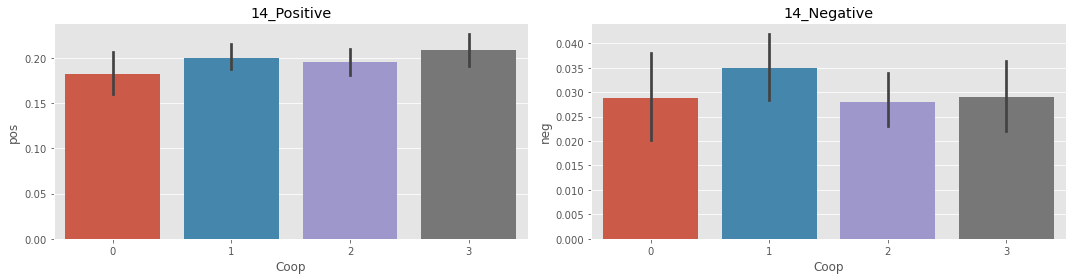

In [28]:
fig, axs = plt.subplots(1, 2, figsize=(15, 4))
sns.barplot(data=vaders0, x='Coop', y='pos', ax=axs[0])
sns.barplot(data=vaders0, x='Coop', y='neg', ax=axs[1])
axs[0].set_title('14_Positive')
axs[1].set_title('14_Negative')
plt.tight_layout()
plt.show()

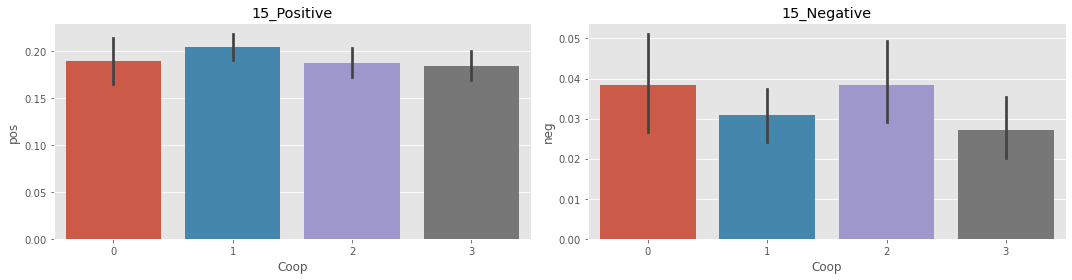

In [29]:
fig, axs1 = plt.subplots(1, 2, figsize=(15, 4))
sns.barplot(data=vaders1, x='Coop', y='pos', ax=axs1[0])
sns.barplot(data=vaders1, x='Coop', y='neg', ax=axs1[1])
axs1[0].set_title('15_Positive')
axs1[1].set_title('15_Negative')
plt.tight_layout()
plt.show()

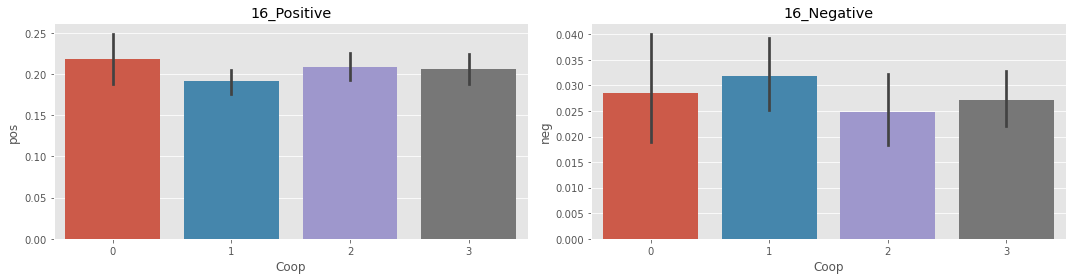

In [30]:
fig, axs2 = plt.subplots(1, 2, figsize=(15, 4))
sns.barplot(data=vaders2, x='Coop', y='pos', ax=axs2[0])
sns.barplot(data=vaders2, x='Coop', y='neg', ax=axs2[1])
axs2[0].set_title('16_Positive')  
axs2[1].set_title('16_Negative')
plt.tight_layout()
plt.show()

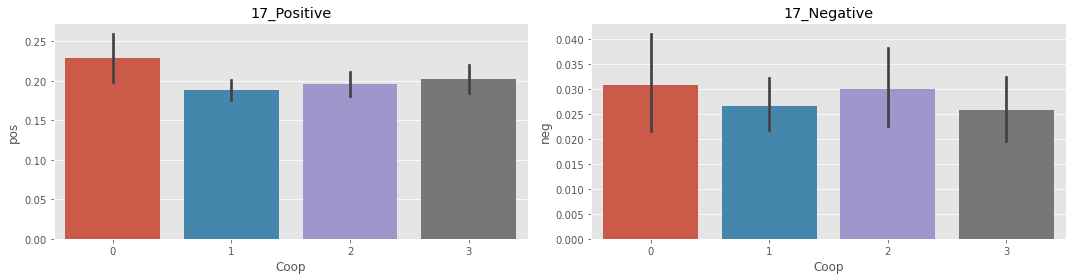

In [31]:
fig, axs3 = plt.subplots(1, 2, figsize=(15, 4))
sns.barplot(data=vaders3, x='Coop', y='pos', ax=axs3[0])
sns.barplot(data=vaders3, x='Coop', y='neg', ax=axs3[1])
axs3[0].set_title('17_Positive')
axs3[1].set_title('17_Negative')
plt.tight_layout()
plt.show()

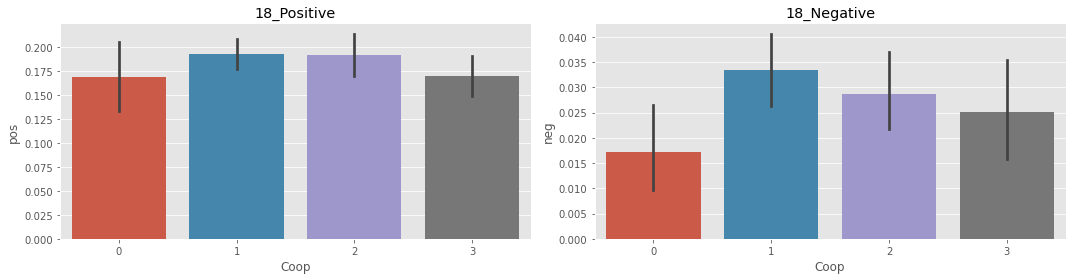

In [32]:
fig, axs4 = plt.subplots(1, 2, figsize=(15, 4))
sns.barplot(data=vaders4, x='Coop', y='pos', ax=axs4[0])
sns.barplot(data=vaders4, x='Coop', y='neg', ax=axs4[1])
axs4[0].set_title('18_Positive')
axs4[1].set_title('18_Negative')
plt.tight_layout()
plt.show()

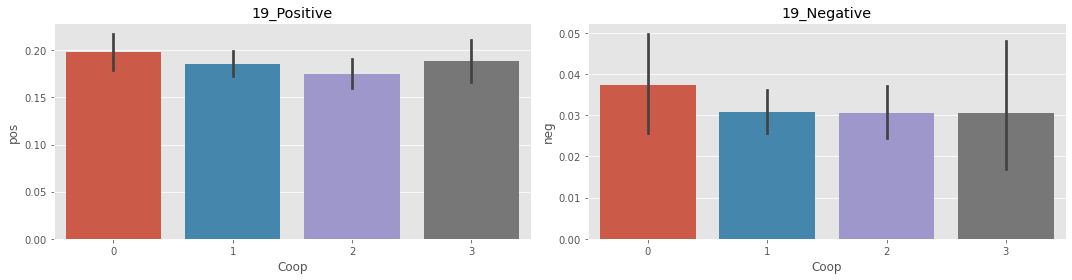

In [33]:
fig, axs5 = plt.subplots(1, 2, figsize=(15, 4))
sns.barplot(data=vaders5, x='Coop', y='pos', ax=axs5[0])
sns.barplot(data=vaders5, x='Coop', y='neg', ax=axs5[1])
axs5[0].set_title('19_Positive')
axs5[1].set_title('19_Negative')
plt.tight_layout()
plt.show()

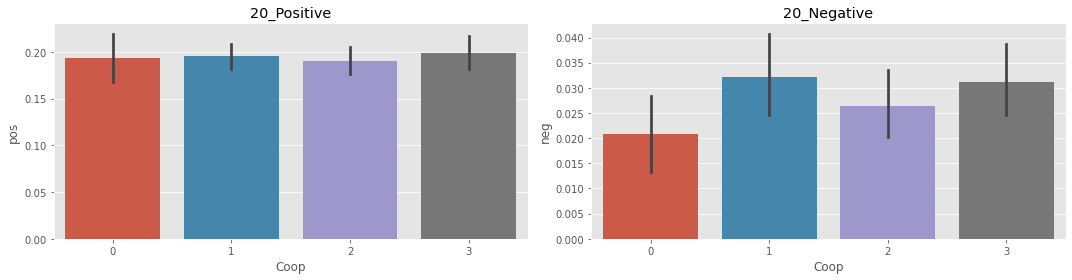

In [34]:
fig, axs6 = plt.subplots(1, 2, figsize=(15, 4))
sns.barplot(data=vaders6, x='Coop', y='pos', ax=axs6[0])
sns.barplot(data=vaders6, x='Coop', y='neg', ax=axs6[1])
axs6[0].set_title('20_Positive')
axs6[1].set_title('20_Negative')
plt.tight_layout()
plt.show()

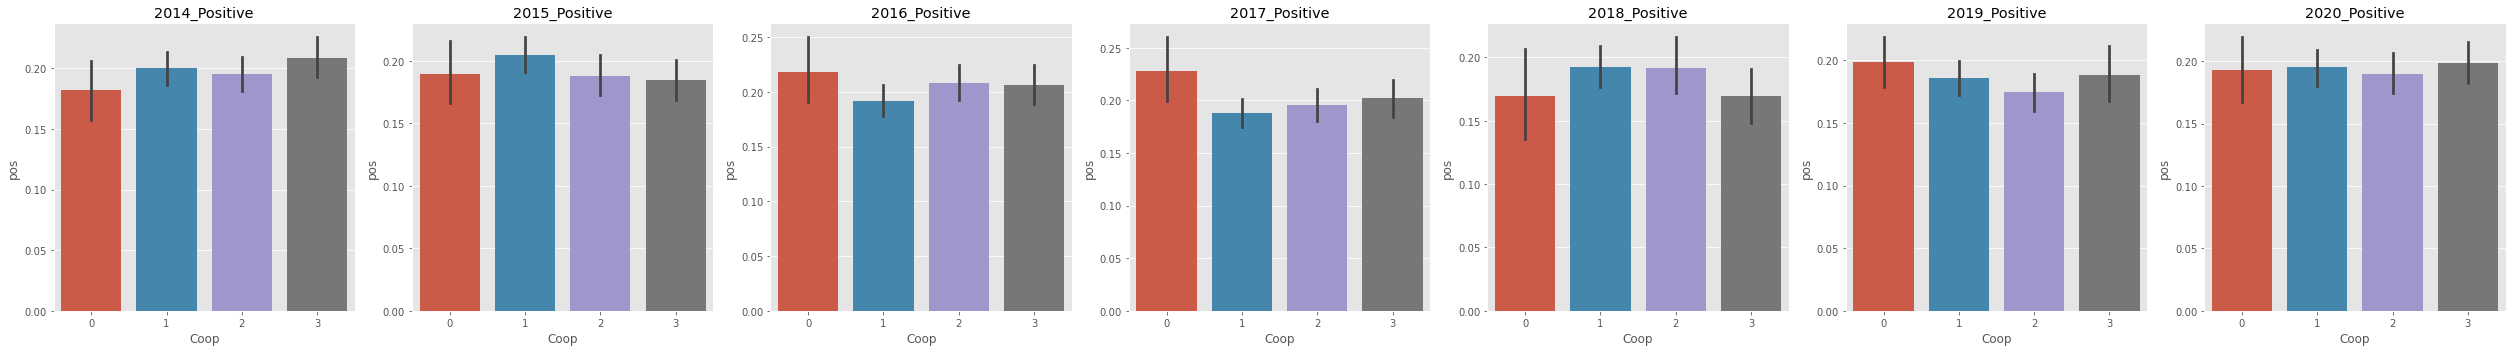

In [35]:
fig, axs7 = plt.subplots(1, 7, figsize=(35, 5))
sns.barplot(data=vaders0, x='Coop', y='pos', ax=axs7[0])
sns.barplot(data=vaders1, x='Coop', y='pos', ax=axs7[1])
sns.barplot(data=vaders2, x='Coop', y='pos', ax=axs7[2])
sns.barplot(data=vaders3, x='Coop', y='pos', ax=axs7[3])
sns.barplot(data=vaders4, x='Coop', y='pos', ax=axs7[4])
sns.barplot(data=vaders5, x='Coop', y='pos', ax=axs7[5])
sns.barplot(data=vaders6, x='Coop', y='pos', ax=axs7[6])
axs7[0].set_title('2014_Positive')
axs7[1].set_title('2015_Positive')
axs7[2].set_title('2016_Positive')
axs7[3].set_title('2017_Positive')
axs7[4].set_title('2018_Positive')
axs7[5].set_title('2019_Positive')
axs7[6].set_title('2020_Positive')
plt.tight_layout()
plt.show()

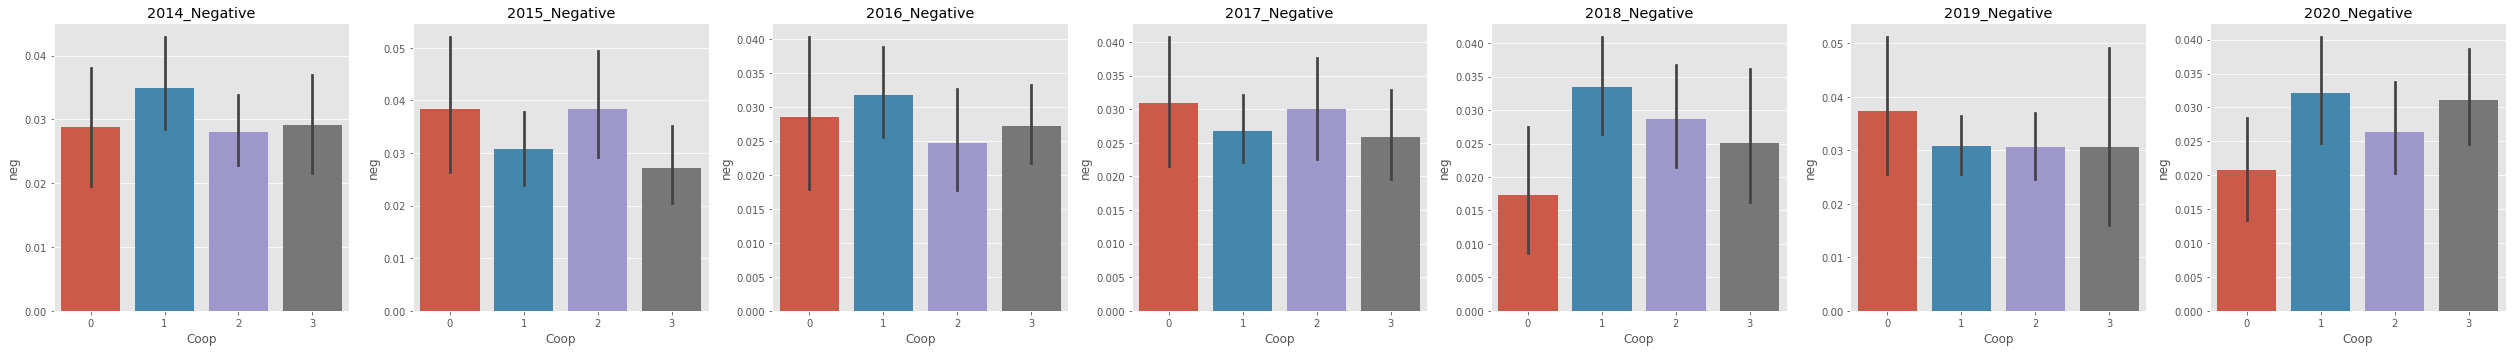

In [36]:
fig, axs8 = plt.subplots(1, 7, figsize=(35, 5))
sns.barplot(data=vaders0, x='Coop', y='neg', ax=axs8[0])
sns.barplot(data=vaders1, x='Coop', y='neg', ax=axs8[1])
sns.barplot(data=vaders2, x='Coop', y='neg', ax=axs8[2])
sns.barplot(data=vaders3, x='Coop', y='neg', ax=axs8[3])
sns.barplot(data=vaders4, x='Coop', y='neg', ax=axs8[4])
sns.barplot(data=vaders5, x='Coop', y='neg', ax=axs8[5])
sns.barplot(data=vaders6, x='Coop', y='neg', ax=axs8[6])
axs8[0].set_title('2014_Negative')
axs8[1].set_title('2015_Negative')
axs8[2].set_title('2016_Negative')
axs8[3].set_title('2017_Negative')
axs8[4].set_title('2018_Negative')
axs8[5].set_title('2019_Negative')
axs8[6].set_title('2020_Negative')
plt.tight_layout()
plt.show()

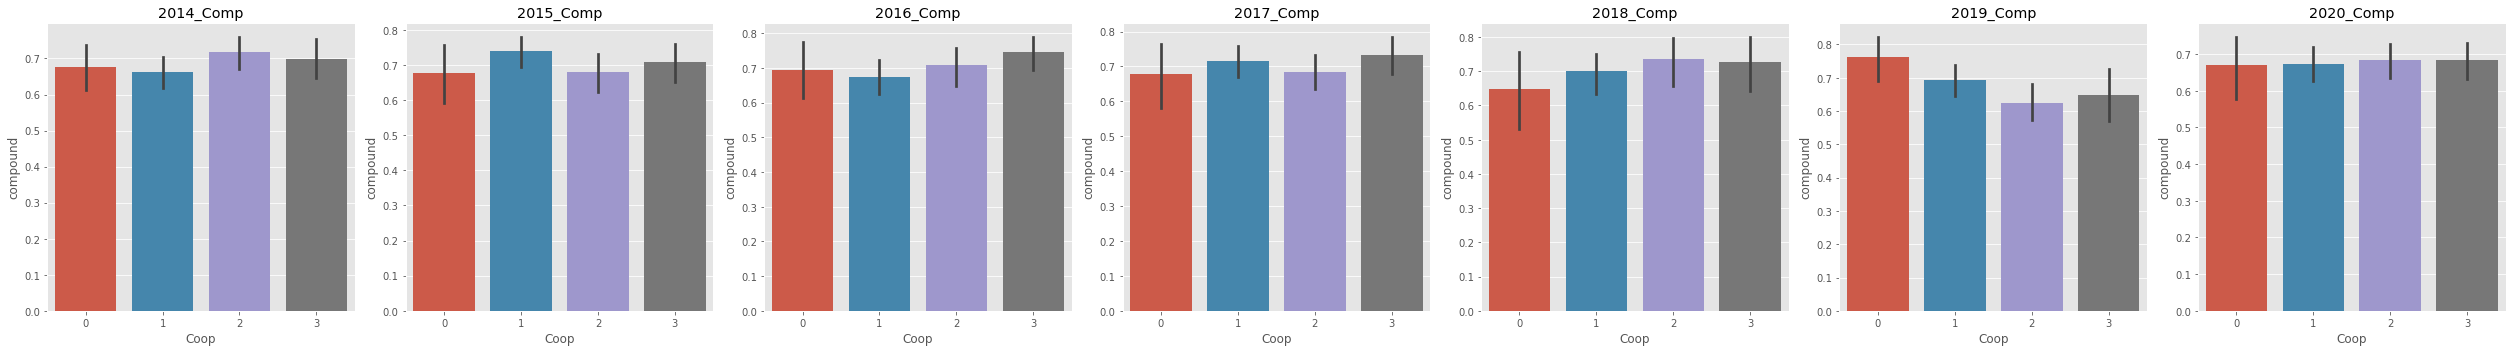

In [37]:
fig, axs9 = plt.subplots(1, 7, figsize=(35, 5))
sns.barplot(data=vaders0, x='Coop', y='compound', ax=axs9[0])
sns.barplot(data=vaders1, x='Coop', y='compound', ax=axs9[1])
sns.barplot(data=vaders2, x='Coop', y='compound', ax=axs9[2])
sns.barplot(data=vaders3, x='Coop', y='compound', ax=axs9[3])
sns.barplot(data=vaders4, x='Coop', y='compound', ax=axs9[4])
sns.barplot(data=vaders5, x='Coop', y='compound', ax=axs9[5])
sns.barplot(data=vaders6, x='Coop', y='compound', ax=axs9[6])
axs9[0].set_title('2014_Comp')
axs9[1].set_title('2015_Comp')
axs9[2].set_title('2016_Comp')
axs9[3].set_title('2017_Comp')
axs9[4].set_title('2018_Comp')
axs9[5].set_title('2019_Comp')
axs9[6].set_title('2020_Comp')
plt.tight_layout()
plt.show()

In [38]:
import pandas as pd 
vaders0.to_csv('2014filtered_merged.csv')
vaders1.to_csv('2015filtered_merged.csv')
vaders2.to_csv('2016filtered_merged.csv')
vaders3.to_csv('2017filtered_merged.csv')
vaders4.to_csv('2018filtered_merged.csv')
vaders5.to_csv('2019filtered_merged.csv')
vaders6.to_csv('2020filtered_merged.csv')


In [39]:
# Install and import nltk
!pip install nltk
import nltk

# Download the lexicon
nltk.download("vader_lexicon")

# Import the lexicon 
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create an instance of SentimentIntensityAnalyzer
sent_analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/yaminirege/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [40]:
def vadersentimentanalysis(Merged1):
    vs = sent_analyzer.polarity_scores(Merged1)
    return vs['compound']

In [41]:
df0['Vader Sentiment'] = df0['Merged1'].apply(vadersentimentanalysis)

In [42]:
# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound <= -0.5 :
        return 'Negative'
    else:
        return 'Neutral'

In [43]:
df0['Vader Analysis'] = df0['Vader Sentiment'].apply(vader_analysis)
df0.head()

,ID,Terms,Class (BOT),Major,Conc,Coop,Citizenship,Strengths,Weakness,Acad,Merged1,Vader Sentiment,Vader Analysis
0,6,201435-201445,SR,ACCT,4COP,0,US Citizen,[Student's] strengths include the ability to m...,In the time that I worked with [Student] - the...,None,[Student's] strengths include the ability to m...,0.8934,Positive
1,11,201415-201425,JR,FIN,4COP,0,US Citizen,Demonstrates knowledge in compiling and analyz...,Improvement needed in areas of following proto...,Student needs a strong role model to help him ...,Demonstrates knowledge in compiling and analyz...,0.8555,Positive
2,25,201435-201445,JR,GBUS,4COP,0,US Citizen,"[Student] is detail-oriented, customer-focused...",Opportunity exists for [Student] to know his a...,Training or a course on Corporate Communicatio...,"[Student] is detail-oriented, customer-focused...",0.5719,Positive
3,37,201435-201445,SR,LGST,5COP,2,US Citizen,Excellent attention to detail and work ethic. ...,Communicating issues in a simple concise manne...,None,Excellent attention to detail and work ethic. ...,0.9538,Positive
4,44,201435-201445,SO,BAE,5COP,1,US Citizen,"Communication skills, leadership, lead by example",late on occasion,None,"Communication skills, leadership, lead by exam...",0.0000,Neutral


In [44]:
vader_counts = df0['Vader Analysis'].value_counts()
vader_counts

Positive    599
Neutral     162
Negative      6
Name: Vader Analysis, dtype: int64

In [45]:
def vadersentimentanalysis(Strengths):
    vs = sent_analyzer.polarity_scores(Strengths)
    return vs['compound']

In [46]:
df0['Vader Sentiment_S'] = df0['Strengths'].apply(vadersentimentanalysis)

In [47]:
df0['Vader Analysis_S'] = df0['Vader Sentiment_S'].apply(vader_analysis)
df0.head()

,ID,Terms,Class (BOT),Major,Conc,Coop,Citizenship,Strengths,Weakness,Acad,Merged1,Vader Sentiment,Vader Analysis,Vader Sentiment_S,Vader Analysis_S
0,6,201435-201445,SR,ACCT,4COP,0,US Citizen,[Student's] strengths include the ability to m...,In the time that I worked with [Student] - the...,None,[Student's] strengths include the ability to m...,0.8934,Positive,0.8271,Positive
1,11,201415-201425,JR,FIN,4COP,0,US Citizen,Demonstrates knowledge in compiling and analyz...,Improvement needed in areas of following proto...,Student needs a strong role model to help him ...,Demonstrates knowledge in compiling and analyz...,0.8555,Positive,0.8555,Positive
2,25,201435-201445,JR,GBUS,4COP,0,US Citizen,"[Student] is detail-oriented, customer-focused...",Opportunity exists for [Student] to know his a...,Training or a course on Corporate Communicatio...,"[Student] is detail-oriented, customer-focused...",0.5719,Positive,0.2732,Neutral
3,37,201435-201445,SR,LGST,5COP,2,US Citizen,Excellent attention to detail and work ethic. ...,Communicating issues in a simple concise manne...,None,Excellent attention to detail and work ethic. ...,0.9538,Positive,0.9325,Positive
4,44,201435-201445,SO,BAE,5COP,1,US Citizen,"Communication skills, leadership, lead by example",late on occasion,None,"Communication skills, leadership, lead by exam...",0.0000,Neutral,0.0000,Neutral


In [48]:
vader_counts = df0['Vader Analysis_S'].value_counts()
vader_counts

Positive    544
Neutral     221
Negative      2
Name: Vader Analysis_S, dtype: int64

In [49]:
def vadersentimentanalysis(Weakness):
    vs = sent_analyzer.polarity_scores(Weakness)
    return vs['compound']

In [50]:
def vadersentimentanalysis(Strengths):
    vs = sent_analyzer.polarity_scores(Strengths)
    return vs['compound']

In [51]:
df0['Vader Sentiment_W'] = df0['Weakness'].apply(vadersentimentanalysis)
df0['Vader Analysis_W'] = df0['Vader Sentiment_W'].apply(vader_analysis)


In [52]:
def vadersentimentanalysis(Strength):
    vs = sent_analyzer.polarity_scores(Strength)
    return vs['compound']

In [53]:
vader_counts = df0['Vader Analysis_W'].value_counts()
vader_counts

Neutral     438
Positive    300
Negative     29
Name: Vader Analysis_W, dtype: int64

In [54]:
def vadersentimentanalysis(Merged):
    vs = sent_analyzer.polarity_scores(Merged)
    return vs['compound']

In [55]:
#2015
df1['Vader Sentiment_M'] = df1['Merged'].apply(vadersentimentanalysis)
df1['Vader Analysis_M'] = df1['Vader Sentiment_M'].apply(vader_analysis)
vader_counts_15 = df1['Vader Analysis_M'].value_counts()
vader_counts_15

Positive    487
Neutral     133
Negative      2
Name: Vader Analysis_M, dtype: int64

In [56]:
#2016
df2['Vader Sentiment_M'] = df2['Merged'].apply(vadersentimentanalysis)
df2['Vader Analysis_M'] = df2['Vader Sentiment_M'].apply(vader_analysis)
vader_counts_16 = df2['Vader Analysis_M'].value_counts()
vader_counts_16

Positive    492
Neutral     117
Negative      7
Name: Vader Analysis_M, dtype: int64

In [57]:
#2017
df3['Vader Sentiment_M'] = df3['Merged'].apply(vadersentimentanalysis)
df3['Vader Analysis_M'] = df3['Vader Sentiment_M'].apply(vader_analysis)
vader_counts_17 = df3['Vader Analysis_M'].value_counts()
vader_counts_17

Positive    526
Neutral     122
Negative      9
Name: Vader Analysis_M, dtype: int64

In [58]:
#2018
df4['Vader Sentiment_M'] = df4['Merged'].apply(vadersentimentanalysis)
df4['Vader Analysis_M'] = df4['Vader Sentiment_M'].apply(vader_analysis)
vader_counts_18 = df4['Vader Analysis_M'].value_counts()
vader_counts_18

Positive    255
Neutral      69
Negative      2
Name: Vader Analysis_M, dtype: int64

In [59]:
#2019
df5['Vader Sentiment_M'] = df5['Merged'].apply(vadersentimentanalysis)
df5['Vader Analysis_M'] = df5['Vader Sentiment_M'].apply(vader_analysis)
vader_counts_19 = df5['Vader Analysis_M'].value_counts()
vader_counts_19

Positive    435
Neutral     133
Negative      6
Name: Vader Analysis_M, dtype: int64

In [60]:
#2020
df6['Vader Sentiment_M'] = df6['merged'].apply(vadersentimentanalysis)
df6['Vader Analysis_M'] = df6['Vader Sentiment_M'].apply(vader_analysis)
vader_counts_20 = df6['Vader Analysis_M'].value_counts()
vader_counts_20

Positive    540
Neutral     158
Negative      7
Name: Vader Analysis_M, dtype: int64

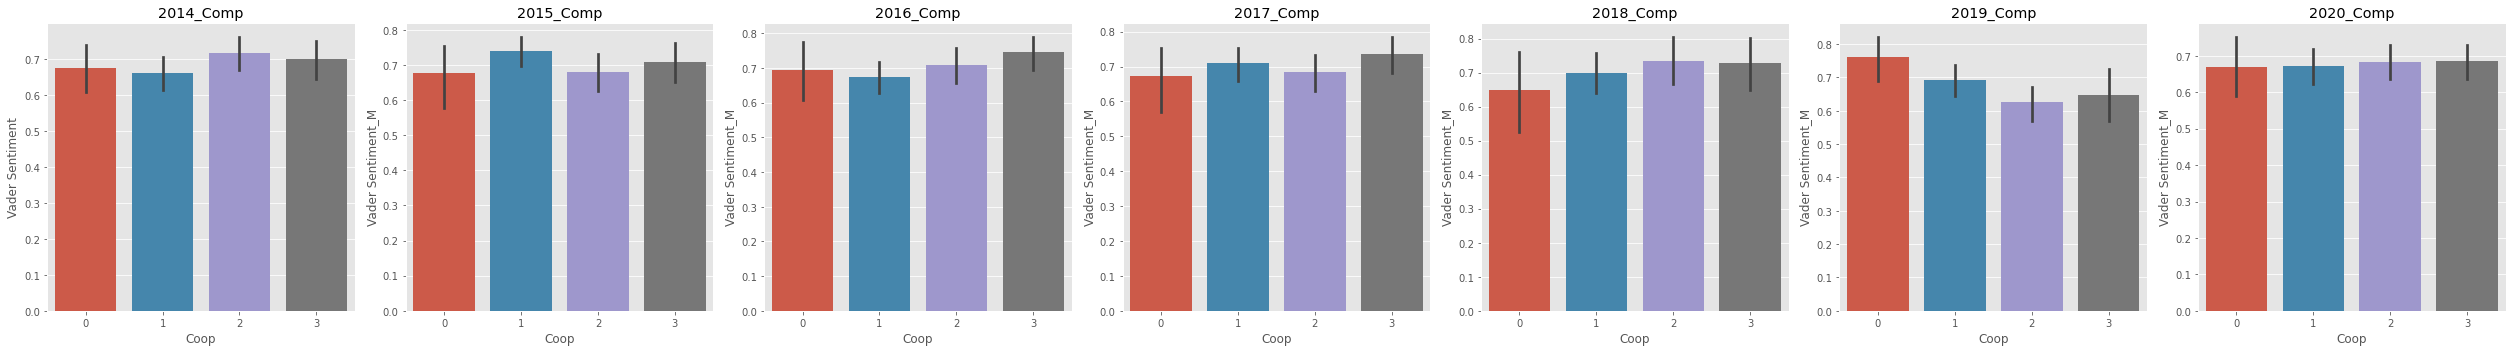

In [61]:
fig, axs10 = plt.subplots(1, 7, figsize=(35, 5))
sns.barplot(data=df0, x='Coop', y='Vader Sentiment', ax=axs10[0])
sns.barplot(data=df1, x='Coop', y='Vader Sentiment_M', ax=axs10[1])
sns.barplot(data=df2, x='Coop', y='Vader Sentiment_M', ax=axs10[2])
sns.barplot(data=df3, x='Coop', y='Vader Sentiment_M', ax=axs10[3])
sns.barplot(data=df4, x='Coop', y='Vader Sentiment_M', ax=axs10[4])
sns.barplot(data=df5, x='Coop', y='Vader Sentiment_M', ax=axs10[5])
sns.barplot(data=df6, x='Coop', y='Vader Sentiment_M', ax=axs10[6])
axs10[0].set_title('2014_Comp')
axs10[1].set_title('2015_Comp')
axs10[2].set_title('2016_Comp')
axs10[3].set_title('2017_Comp')
axs10[4].set_title('2018_Comp')
axs10[5].set_title('2019_Comp')
axs10[6].set_title('2020_Comp')
plt.tight_layout()
plt.show()

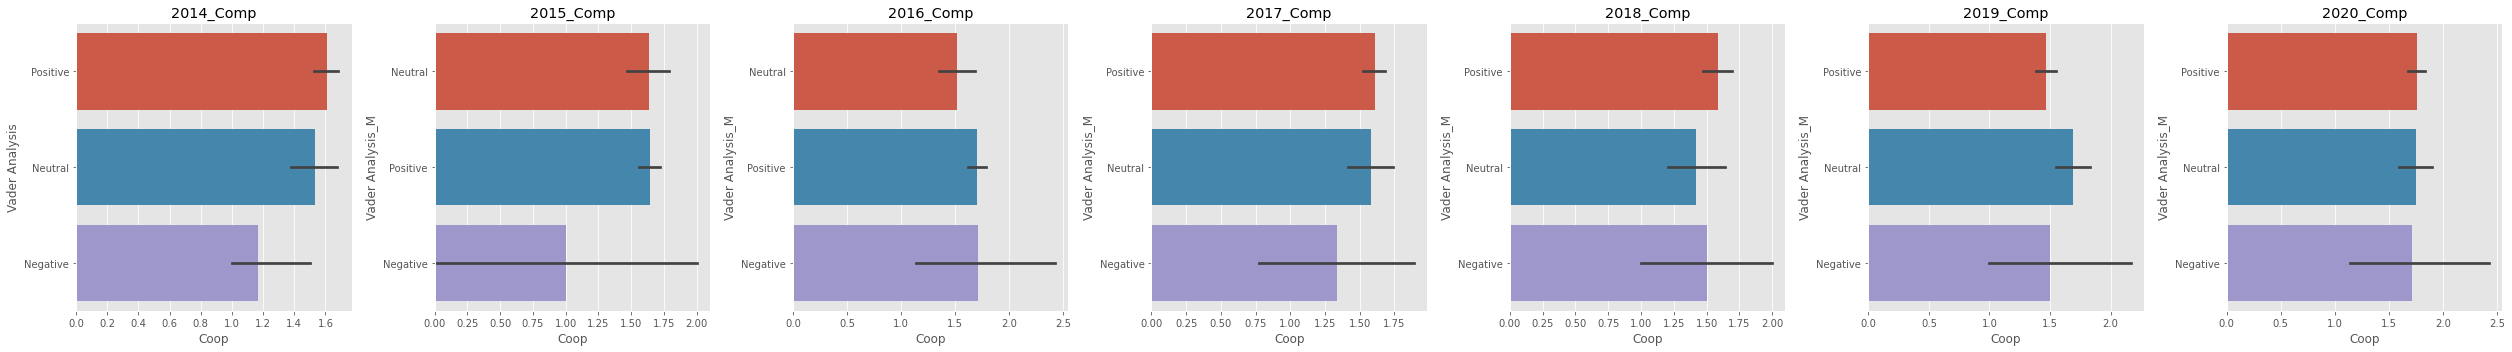

In [62]:
fig, axs11 = plt.subplots(1, 7, figsize=(35, 5))
sns.barplot(data=df0, x='Coop', y='Vader Analysis', ax=axs11[0])
sns.barplot(data=df1, x='Coop', y='Vader Analysis_M', ax=axs11[1])
sns.barplot(data=df2, x='Coop', y='Vader Analysis_M', ax=axs11[2])
sns.barplot(data=df3, x='Coop', y='Vader Analysis_M', ax=axs11[3])
sns.barplot(data=df4, x='Coop', y='Vader Analysis_M', ax=axs11[4])
sns.barplot(data=df5, x='Coop', y='Vader Analysis_M', ax=axs11[5])
sns.barplot(data=df6, x='Coop', y='Vader Analysis_M', ax=axs11[6])
axs11[0].set_title('2014_Comp')
axs11[1].set_title('2015_Comp')
axs11[2].set_title('2016_Comp')
axs11[3].set_title('2017_Comp')
axs11[4].set_title('2018_Comp')
axs11[5].set_title('2019_Comp')
axs11[6].set_title('2020_Comp')
plt.tight_layout()
plt.show()

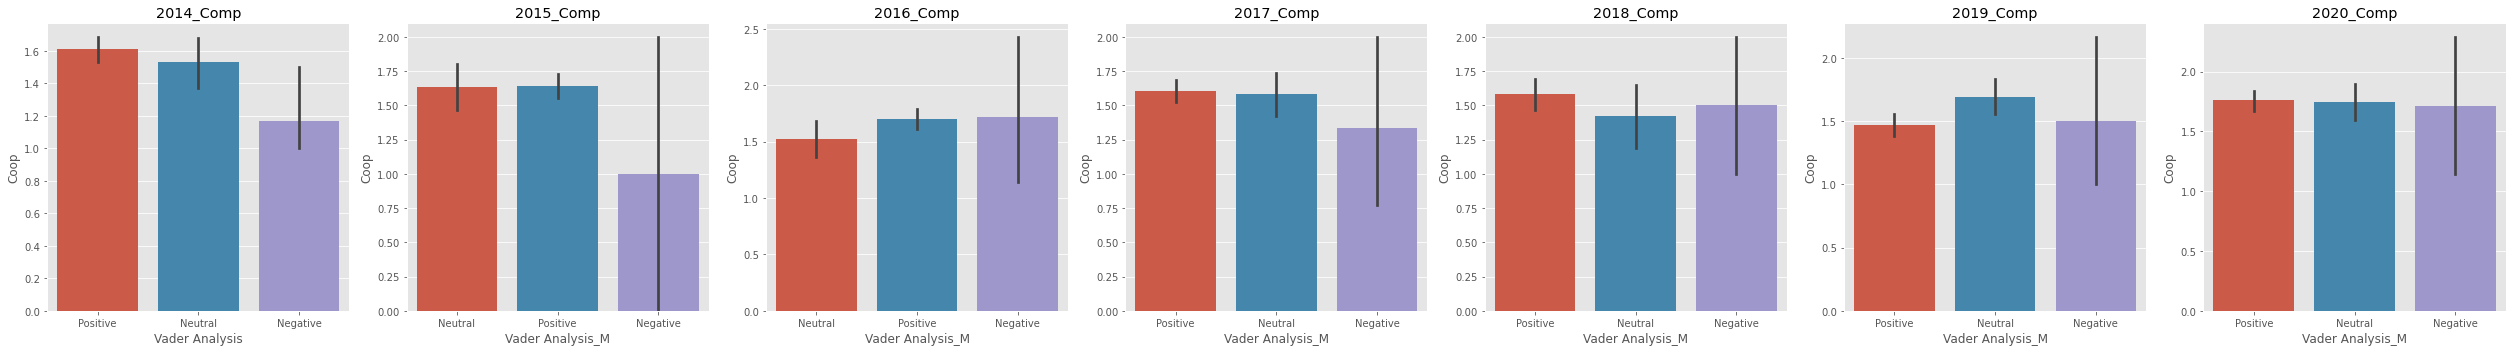

In [63]:
fig, axs12 = plt.subplots(1, 7, figsize=(35, 5))
sns.barplot(data=df0, x='Vader Analysis', y='Coop', ax=axs12[0])
sns.barplot(data=df1, x='Vader Analysis_M', y='Coop', ax=axs12[1])
sns.barplot(data=df2, x='Vader Analysis_M', y='Coop', ax=axs12[2])
sns.barplot(data=df3, x='Vader Analysis_M', y='Coop', ax=axs12[3])
sns.barplot(data=df4, x='Vader Analysis_M', y='Coop', ax=axs12[4])
sns.barplot(data=df5, x='Vader Analysis_M', y='Coop', ax=axs12[5])
sns.barplot(data=df6, x='Vader Analysis_M', y='Coop', ax=axs12[6])
axs12[0].set_title('2014_Comp')
axs12[1].set_title('2015_Comp')
axs12[2].set_title('2016_Comp')
axs12[3].set_title('2017_Comp')
axs12[4].set_title('2018_Comp')
axs12[5].set_title('2019_Comp')
axs12[6].set_title('2020_Comp')
plt.tight_layout()
plt.show()

In [64]:
#S_2015
df1['Vader Sentiment_S'] = df1['Strengths'].apply(vadersentimentanalysis)
df1['Vader Analysis_S'] = df1['Vader Sentiment_S'].apply(vader_analysis)
vader_counts_S15 = df1['Vader Analysis_S'].value_counts()
vader_counts_S15

Positive    456
Neutral     166
Name: Vader Analysis_S, dtype: int64

In [65]:
#S_2016
df2['Vader Sentiment_S'] = df2['Strengths'].apply(vadersentimentanalysis)
df2['Vader Analysis_S'] = df2['Vader Sentiment_S'].apply(vader_analysis)
vader_counts_S16 = df2['Vader Analysis_S'].value_counts()
vader_counts_S16

Positive    444
Neutral     171
Negative      1
Name: Vader Analysis_S, dtype: int64

In [66]:
#S_2017
df3['Vader Sentiment_S'] = df3['Strengths'].apply(vadersentimentanalysis)
df3['Vader Analysis_S'] = df3['Vader Sentiment_S'].apply(vader_analysis)
vader_counts_S17 = df3['Vader Analysis_S'].value_counts()
vader_counts_S17

Positive    488
Neutral     167
Negative      2
Name: Vader Analysis_S, dtype: int64

In [67]:
#S_2018
df4['Vader Sentiment_S'] = df4['Strengths'].apply(vadersentimentanalysis)
df4['Vader Analysis_S'] = df4['Vader Sentiment_S'].apply(vader_analysis)
vader_counts_S18 = df4['Vader Analysis_S'].value_counts()
vader_counts_S18

Positive    231
Neutral      95
Name: Vader Analysis_S, dtype: int64

In [68]:
df5.head()

,Responder ID,Work Terms,Major,Concentration,Class,Citizenship,Coop,Strengths,Weakness,Acad,Merged,Vader Sentiment_M,Vader Analysis_M
0,12,201915-201925,FIN,5COP,JR,Domestic,3,Consistently willing to help out wherever nece...,Needs to pay more attention to detail and ensu...,Please note that this is not directly related ...,Consistently willing to help out wherever nece...,0.9169,Positive
1,27,201935-201945,BAE,5COP,SR,Domestic,3,1. Energy and thirst for learning new skills\r...,1. More Frequent Communication & Status Update...,N/A - Perfect fit,1. Energy and thirst for learning new skills\r...,0.9954,Positive
2,58,201935-201945,SPBS,5COP,SR,Domestic,3,Jalen connects well with his peers. He is a g...,Jalen can improve on being more aligned with t...,I would encourage Jalen to seek out courses in...,Jalen connects well with his peers. He is a g...,0.9325,Positive
3,69,201925-201935,ACCT,5COP,SR,Domestic,0,hard worker and consistently showed up on time,na,na,hard worker and consistently showed up on timena,-0.1027,Neutral
4,75,201935-201945,MKTG,5COP,SR,Domestic,3,As you can see by all of the Top 10% selection...,His biggest weakness is the rate at which I'm ...,No changes.,As you can see by all of the Top 10% selection...,0.7096,Positive


In [69]:
import pandas as pd 
df0.to_csv('2014filtered_vader.csv')
df1.to_csv('2015filtered_vader.csv')
df2.to_csv('2016filtered_vader.csv')
df3.to_csv('2017filtered_vader.csv')
df4.to_csv('2018filtered_vader.csv')
df5.to_csv('2019filtered_vader.csv')
df6.to_csv('2020filtered_vader.csv')


In [70]:
!pip install -q transformers tweepy wordcloud matplotlib

